Day 4
Unsupervised Learning

Introduction to Unsupervised Learning
https://algorithmia.com/blog/introduction-to-unsupervised-learning

“Unsupervised Learning and Data Clustering” by Sanatan Mishra https://link.medium.com/RUlFBArf94
“Unsupervised Learning: Dimensionality Reduction” by Victor Roman https://link.medium.com/eZStdrvf94

Dataset link: https://www.kaggle.com/c/expedia-personalized-sort/data


In [32]:
!pip install kaggle
!mkdir -p ~/.kaggle


In [0]:
import json
token = {"username":"altafshaikh","key":"e4a7d1a5b1ac792fe0a1d2f4ad2017ef"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/

In [35]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [37]:
!kaggle competitions download -c expedia-personalized-sort

testOrderBenchmark.zip: Skipping, found more recently modified local copy (use --force to force download)
data.zip: Skipping, found more recently modified local copy (use --force to force download)
basicPythonBenchmark.zip: Skipping, found more recently modified local copy (use --force to force download)
randomBenchmark.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
import os
import gc
import glob
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt

In [39]:
files = glob.glob("*.zip")
files

['testOrderBenchmark.zip',
 'basicPythonBenchmark.zip',
 'randomBenchmark.zip',
 'data.zip']

In [40]:
!unzip data.zip -d data

Archive:  data.zip
replace data/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
csvs = glob.glob("data/*.csv")

In [42]:
csvs

['data/train.csv', 'data/test.csv']

In [0]:
train = pd.read_csv("data/train.csv" ,nrows=300000)

In [0]:
test = pd.read_csv("/content/data/test.csv")

In [45]:
train.head(10)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,-1.0,0.0,5.0,-1.0,0.0,5.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
5,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,30184,4,4.5,1,2.77,0.1302,5.20,7,195.32,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,7.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0,NaN,0
6,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,44147,3,3.5,1,2.20,0.0356,4.81,18,129.35,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
7,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,50984,2,0.0,0,1.61,NaN,4.14,35,85.37,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
8,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,53341,4,4.0,1,2.56,0.1238,5.18,3,150.05,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,6.0,0,NaN,0
9,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,56880,4,4.0,1,2.83,0.1028,5.15,10,280.69,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [0]:
train["date_time"] = pd.to_datetime(train["date_time"])
props = {}
for prop in ["month", "day", "hour", "minute", "dayofweek", "quarter"]:
    props[prop] = getattr(train["date_time"].dt, prop)
train = train.join(pd.DataFrame(props))


test["date_time"] = pd.to_datetime(test["date_time"])
props = {}
for prop in ["month", "day", "hour", "minute", "dayofweek", "quarter"]:
    props[prop] = getattr(test["date_time"].dt, prop)
test = test.join(pd.DataFrame(props))

In [47]:
train

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,month,day,hour,minute,dayofweek,quarter
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,4,4,8,32,3,2
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,4,4,8,32,3,2
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,4,4,8,32,3,2
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,-1.0,0.0,5.0,-1.0,0.0,5.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0,4,4,8,32,3,2
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,4,4,8,32,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,20074,2013-06-18 13:37:33,5,219,NaN,NaN,219,33035,3,4.0,1,1.95,0.0723,0.00,6,94.00,1,2715,1,0,1,0,1,0,NaN,973.41,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,21.0,0,NaN,0,6,18,13,37,1,2
299996,20074,2013-06-18 13:37:33,5,219,NaN,NaN,219,47087,3,4.5,1,0.69,0.0122,0.00,13,135.00,0,2715,1,0,1,0,1,0,NaN,978.64,0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0,NaN,0,6,18,13,37,1,2
299997,20074,2013-06-18 13:37:33,5,219,NaN,NaN,219,53867,2,4.5,1,1.95,0.0215,0.00,9,89.00,0,2715,1,0,1,0,1,0,NaN,973.12,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,6,18,13,37,1,2
299998,20074,2013-06-18 13:37:33,5,219,NaN,NaN,219,60758,3,4.5,1,1.79,0.0228,0.00,7,120.00,0,2715,1,0,1,0,1,0,NaN,969.09,0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,6,18,13,37,1,2


In [0]:
train.fillna(0, inplace=True)

train_sample = train.fillna(value=0)

feature_names = list(train_sample.columns)
feature_names.remove("click_bool")
feature_names.remove("booking_bool")
feature_names.remove("gross_bookings_usd")
feature_names.remove("date_time")
feature_names.remove("position")

features = train_sample[feature_names].values

In [49]:
features

array([[1.0000e+00, 1.2000e+01, 1.8700e+02, ..., 3.2000e+01, 3.0000e+00,
        2.0000e+00],
       [1.0000e+00, 1.2000e+01, 1.8700e+02, ..., 3.2000e+01, 3.0000e+00,
        2.0000e+00],
       [1.0000e+00, 1.2000e+01, 1.8700e+02, ..., 3.2000e+01, 3.0000e+00,
        2.0000e+00],
       ...,
       [2.0074e+04, 5.0000e+00, 2.1900e+02, ..., 3.7000e+01, 1.0000e+00,
        2.0000e+00],
       [2.0074e+04, 5.0000e+00, 2.1900e+02, ..., 3.7000e+01, 1.0000e+00,
        2.0000e+00],
       [2.0074e+04, 5.0000e+00, 2.1900e+02, ..., 3.7000e+01, 1.0000e+00,
        2.0000e+00]])

In [50]:
cols = train.select_dtypes(include=[np.object])
cols.columns

Index([], dtype='object')

In [0]:
from sklearn.cluster import KMeans

In [52]:
train_kmeans = KMeans(n_clusters=15)
train_kmeans.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [54]:
train_kmeans.cluster_centers_

array([[ 1.00912666e+04,  1.01579972e+01,  1.75710193e+02,
         1.64755804e-01,  8.75323630e+00,  1.73249270e+02,
         1.09613129e+05,  3.19479321e+00,  3.78293958e+00,
         6.33885102e-01,  2.83643417e+00,  1.05629662e-01,
         4.31902373e+00,  2.13452409e+02,  2.01506688e-01,
         2.15616699e+04,  2.35120176e+00,  3.87118331e+01,
         1.95695178e+00,  3.56890278e-01,  1.10454569e+00,
         5.10377697e-01, -1.55878622e+00,  8.68431664e+02,
         2.99697637e-01,  9.63460257e-03,  1.02495772e-03,
         2.41736278e+00,  1.65018193e-02,  1.78855122e-02,
         2.01563061e+00,  6.96971250e-03,  2.47014811e-02,
         1.43412084e+00, -3.74109568e-03,  5.58601958e-03,
         1.01164352e+01,  1.24532363e-02,  2.15241121e-02,
         3.07887050e+00,  6.30348998e-03,  3.63859991e-03,
         3.73443345e-01,  7.12345616e-03,  5.38102803e-03,
         5.16681187e-01, -2.10116333e-02,  3.68984779e-03,
         1.75703377e+00,  5.26551530e+00,  1.55469687e+0

In [56]:
np.unique(train_kmeans.labels_) ## cluster label

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int32)

In [57]:
train_kmeans.fit(features).score(features)

-25267901726007.44

range(1, 20)
[-526379889285440.0, -156863658249436.22, -86764238745797.64, -63059253704384.92, -51532919071398.484, -45716404455981.58, -42101378122449.15, -39490107620967.87, -36975334179937.01, -34381144083171.258, -32020654150392.805, -29793692452623.27, -27980671086360.38, -26539664081982.285, -25267414578244.277, -24311661936408.03, -23443098022280.457, -22720870047331.805, -22154798232907.76]


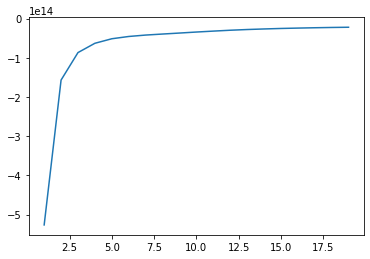

In [58]:
nc = range(1,20) ; print(nc)
kmeans = [KMeans(n_clusters=i) for i in nc]
kmeans
score = [kmeans[i].fit(features).score(features) for i in range(len(kmeans))]

print(score)

plt.plot(nc,score)

Text(0.5, 1.0, 'Elbow Plot--Finding Cluster')

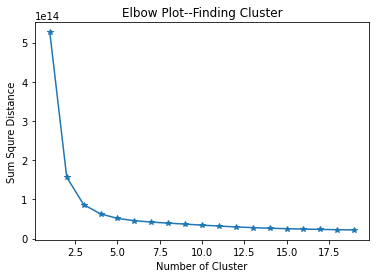

In [60]:
res = np.absolute(score)
res

plt.plot(nc,res,marker="*")
plt.xlabel("Number of Cluster")
plt.ylabel("Sum Squre Distance")
plt.title("Elbow Plot--Finding Cluster")

In [61]:
cluster_df = pd.concat([train,pd.Series(train_kmeans.labels_)], axis=1)
cluster_df.head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,month,day,hour,minute,dayofweek,quarter,0
0,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,4,4,8,32,3,2,6
1,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,4,4,8,32,3,2,6
2,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,4,4,8,32,3,2,4
3,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,0.0,0.0,1,0.0,0.0,0.0,-1.0,0.0,5.0,-1.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,5.0,0,0.0,0,4,4,8,32,3,2,4
4,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,4,4,8,32,3,2,4


In [62]:
list(train_kmeans.labels_)

[6,
 6,
 4,
 4,
 4,
 4,
 7,
 7,
 7,
 7,
 7,
 7,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 3,
 3,
 3,
 3,
 1,
 2,
 2,
 2,
 8,
 13,
 13,
 13,
 13,
 0,
 0,
 0,
 0,
 0,
 9,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 10,
 5,
 3,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 6,
 4,
 7,
 3,
 3,
 2,
 2,
 8,
 8,
 8,
 8,
 13,
 13,
 13,
 13,
 0,
 0,
 0,
 0,
 0,
 14,
 14,
 5,
 11,
 12,
 12,
 2,
 2,
 2,
 8,
 8,
 8,
 8,
 8,
 8,
 4,
 13,
 13,
 13,
 0,
 0,
 9,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 5,
 5,
 5,
 5,
 11,
 11,
 11,
 12,
 12,
 6,
 6,
 6,
 6,
 6,
 4,
 7,
 7,
 7,
 7,
 7,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 2,
 2,
 2,
 8,
 8,
 8,
 8,
 13,
 13,
 13,
 0,
 0,
 0,
 0,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 5,
 5,
 5,
 5,
 11,
 11,
 11,
 11,
 12,
 6,
 6,
 6,
 6,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 7,
 7,
 7,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 3,
 3,
 11,
 1,
 1,
 1,
 2,
 2,
 8,
 8,
 8,
 8,
 13,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 14,
 14,
 14

In [63]:
cluster_df.shape


(300000, 61)

In [66]:
cluster_df.rename(columns = {cluster_df.columns[60]: "cluster_name"}, inplace = True)
cluster_df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,month,day,hour,minute,dayofweek,quarter,cluster_name
0,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,4,4,8,32,3,2,6
1,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,4,4,8,32,3,2,6
2,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,4,4,8,32,3,2,4
3,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,0.0,0.0,1,0.0,0.0,0.0,-1.0,0.0,5.0,-1.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,5.0,0,0.0,0,4,4,8,32,3,2,4
4,1,2013-04-04 08:32:15,12,187,0.0,0.0,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,4,4,8,32,3,2,4


In [67]:
cluster_df.sort_values(['cluster_name'])

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,month,day,hour,minute,dayofweek,quarter,cluster_name
52257,3455,2013-03-15 20:41:07,14,100,0.0,0.0,100,53916,4,4.5,1,3.87,0.0369,5.68,10,210.91,0,982,1,27,2,0,1,1,0.0,211.21,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,3,15,20,41,4,1,0
240200,16102,2012-12-13 19:10:40,5,219,0.0,0.0,219,67839,2,2.5,1,1.10,0.0254,4.39,27,45.00,0,4599,2,17,1,0,1,0,0.0,238.47,0,0.0,0.0,0.0,-1.0,0.0,5.0,-1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,12,13,19,10,3,4,0
240199,16102,2012-12-13 19:10:40,5,219,0.0,0.0,219,55298,3,3.5,1,1.95,0.0141,4.55,35,67.00,0,4599,2,17,1,0,1,0,0.0,231.47,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,12,13,19,10,3,4,0
240198,16102,2012-12-13 19:10:40,5,219,0.0,0.0,219,54694,3,4.5,1,1.10,0.0327,4.44,9,61.00,1,4599,2,17,1,0,1,0,0.0,238.63,0,0.0,0.0,0.0,1.0,0.0,9.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,14.0,0,0.0,0,12,13,19,10,3,4,0
240167,16100,2013-03-25 18:40:23,5,219,0.0,0.0,221,68086,5,4.0,0,4.20,0.0741,5.66,18,141.00,0,10247,2,24,2,0,1,1,0.0,4336.49,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,3,25,18,40,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232207,15564,2012-11-08 23:11:10,9,59,0.0,0.0,59,83641,2,4.0,0,3.93,0.0120,3.45,10,27.01,1,6659,7,52,2,2,1,0,0.0,444.00,1,0.0,0.0,0.0,-1.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,11,8,23,11,3,4,14
232208,15564,2012-11-08 23:11:10,9,59,0.0,0.0,59,88136,2,4.0,0,3.85,0.0284,4.61,12,56.91,0,6659,7,52,2,2,1,0,0.0,443.80,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,11,8,23,11,3,4,14
53736,3547,2013-04-17 16:25:24,5,219,0.0,0.0,219,78599,4,4.5,1,2.30,0.0084,5.09,28,180.00,0,13539,2,6,2,0,1,0,0.0,827.97,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,4,17,16,25,2,2,14
232416,15578,2013-02-06 23:26:02,5,15,0.0,0.0,42,86870,5,4.5,1,3.40,0.0844,5.91,12,279.00,0,10596,1,5,1,0,1,0,0.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,2,6,23,26,2,1,14


In [59]:
train.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [87]:
scaler = StandardScaler()
features = scaler.fit_transform(features)
pca = PCA(n_components=10, random_state=42)
pca.fit(features)
op = pca.transform(features)
op.shape

(300000, 10)

In [89]:
kmeans

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorit

In [90]:
kmeans[1].fi

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
unq=np.unique(train_kmeans.labels_)

In [0]:

# plt.scatter(train.orig_destination_distance,train.booking_bool,c=(train_kmeans.labels_),s=200)
# plt.show()

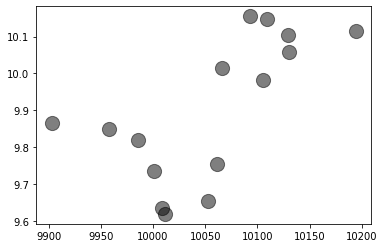

In [96]:
centers = train_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
